In [79]:
from mirror_gates.noisy_fidelity import heuristic_fidelity
import numpy as np
import matplotlib.pyplot as plt
import LovelyPlots.utils as lp  # noqa: F401
import matplotlib.pyplot as plt
import numpy as np
import scienceplots  # noqa: F401

In [80]:
# Constants
N = 16

start_value = 0
end_value = 10_000
num_points = 1000

# Generate Qiskit data
qiskit_durations = np.linspace(
    start_value, end_value, num_points
)  # Define start_value, end_value, and num_points as per your data
qiskit_fidelities = heuristic_fidelity(N, qiskit_durations)

# Generate MIRAGE data (shifted by depth reduction)
mirage_durations_hh = qiskit_durations * (1 - 0.3119)  # 31.19% reduction for heavy-hex
mirage_fidelities_hh = heuristic_fidelity(N, mirage_durations_hh)

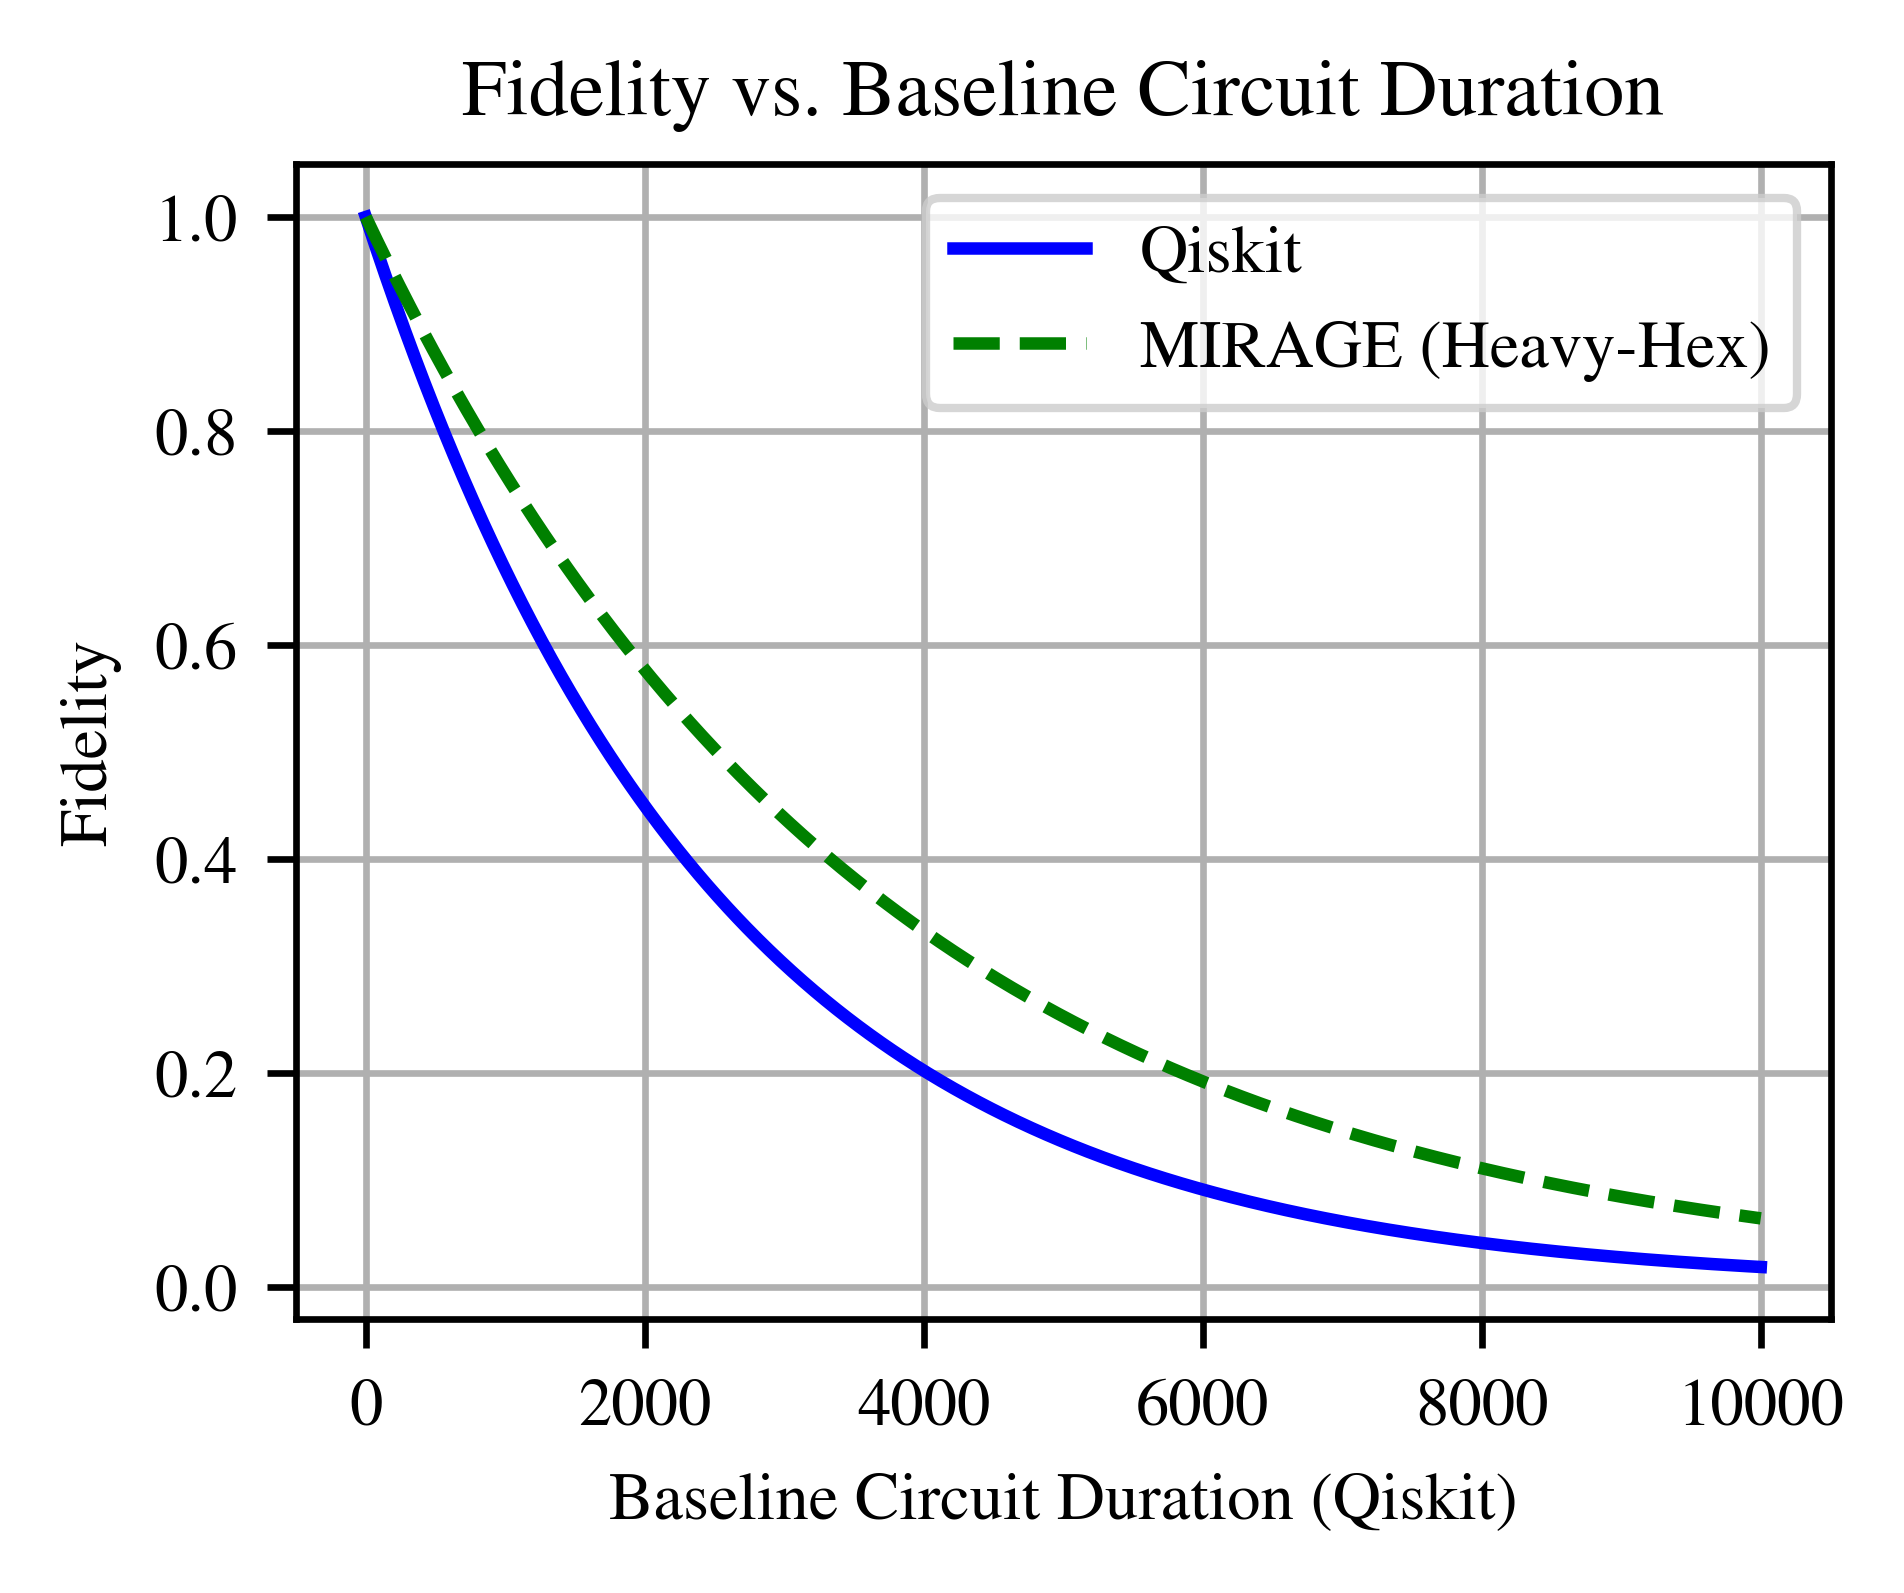

In [81]:
with plt.style.context(["ieee"]):
    # Plot Qiskit data
    plt.plot(qiskit_durations, qiskit_fidelities, label="Qiskit", color="blue")

    # Plot MIRAGE data using Qiskit's durations as the x-axis
    plt.plot(
        qiskit_durations,
        mirage_fidelities_hh,
        label="MIRAGE (Heavy-Hex)",
        color="green",
    )

    # Add labels, title, legend, etc.
    plt.xlabel("Baseline Circuit Duration (Qiskit)")
    plt.ylabel("Fidelity")
    plt.title("Fidelity vs. Baseline Circuit Duration")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()